# Conclusion
The following cells demonstrate the following:
- Relativization outputs are always > 0.
- Relativization keeps the original shape of the input much better than softmax when dealing with extreme amplitudes.
    - Softmax does retain the same shape, until you scale the input amplitudes by a large factor like 100, in which case the shape is lost.
    - If you relativize first before applying the softmax, the shape is almost perfectly retained. Although I heard softmax has a temperature paramter in some implementations? May be worth checking out.

In [1]:
from fractal_zero.utils import relativize_vector
import torch
import matplotlib.pyplot as plt

In [2]:
relativize_vector(torch.ones(100))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
relativize_vector(torch.zeros(100))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
relativize_vector(torch.ones(100) * 1000)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
x = relativize_vector(torch.arange(100, dtype=float))

In [10]:
y = relativize_vector(torch.arange(100, dtype=float) * 100)

In [12]:
assert torch.allclose(x, y)

In [14]:
cyclic = torch.sin(torch.arange(100, dtype=float) * (torch.pi / 10))
cyclic

tensor([ 0.0000e+00,  3.0902e-01,  5.8779e-01,  8.0902e-01,  9.5106e-01,
         1.0000e+00,  9.5106e-01,  8.0902e-01,  5.8779e-01,  3.0902e-01,
         1.2246e-16, -3.0902e-01, -5.8779e-01, -8.0902e-01, -9.5106e-01,
        -1.0000e+00, -9.5106e-01, -8.0902e-01, -5.8779e-01, -3.0902e-01,
        -2.4493e-16,  3.0902e-01,  5.8779e-01,  8.0902e-01,  9.5106e-01,
         1.0000e+00,  9.5106e-01,  8.0902e-01,  5.8779e-01,  3.0902e-01,
         3.6739e-16, -3.0902e-01, -5.8779e-01, -8.0902e-01, -9.5106e-01,
        -1.0000e+00, -9.5106e-01, -8.0902e-01, -5.8779e-01, -3.0902e-01,
        -4.8986e-16,  3.0902e-01,  5.8779e-01,  8.0902e-01,  9.5106e-01,
         1.0000e+00,  9.5106e-01,  8.0902e-01,  5.8779e-01,  3.0902e-01,
         6.1232e-16, -3.0902e-01, -5.8779e-01, -8.0902e-01, -9.5106e-01,
        -1.0000e+00, -9.5106e-01, -8.0902e-01, -5.8779e-01, -3.0902e-01,
        -7.3479e-16,  3.0902e-01,  5.8779e-01,  8.0902e-01,  9.5106e-01,
         1.0000e+00,  9.5106e-01,  8.0902e-01,  5.8

In [18]:
rel_cyclic = relativize_vector(cyclic)
rel_cyclic

tensor([1.0000, 1.3610, 1.6027, 1.7601, 1.8494, 1.8784, 1.8494, 1.7601, 1.6027,
        1.3610, 1.0000, 0.6474, 0.4373, 0.3203, 0.2623, 0.2448, 0.2623, 0.3203,
        0.4373, 0.6474, 1.0000, 1.3610, 1.6027, 1.7601, 1.8494, 1.8784, 1.8494,
        1.7601, 1.6027, 1.3610, 1.0000, 0.6474, 0.4373, 0.3203, 0.2623, 0.2448,
        0.2623, 0.3203, 0.4373, 0.6474, 1.0000, 1.3610, 1.6027, 1.7601, 1.8494,
        1.8784, 1.8494, 1.7601, 1.6027, 1.3610, 1.0000, 0.6474, 0.4373, 0.3203,
        0.2623, 0.2448, 0.2623, 0.3203, 0.4373, 0.6474, 1.0000, 1.3610, 1.6027,
        1.7601, 1.8494, 1.8784, 1.8494, 1.7601, 1.6027, 1.3610, 1.0000, 0.6474,
        0.4373, 0.3203, 0.2623, 0.2448, 0.2623, 0.3203, 0.4373, 0.6474, 1.0000,
        1.3610, 1.6027, 1.7601, 1.8494, 1.8784, 1.8494, 1.7601, 1.6027, 1.3610,
        1.0000, 0.6474, 0.4373, 0.3203, 0.2623, 0.2448, 0.2623, 0.3203, 0.4373,
        0.6474], dtype=torch.float64)

without relative


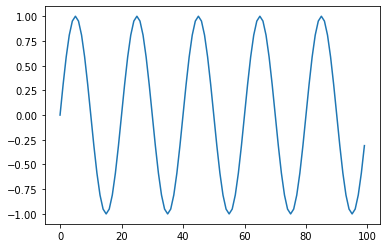

In [19]:
print("without relative")
plt.plot(torch.arange(len(cyclic)), cyclic)
plt.show()

with relative


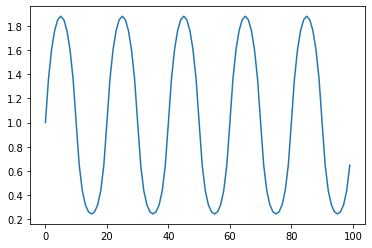

In [20]:
print("with relative")
plt.plot(torch.arange(len(rel_cyclic)), rel_cyclic)
plt.show()

In [21]:
neg_rel_cyclic = relativize_vector(-cyclic)
neg_rel_cyclic

tensor([1.0000, 0.6474, 0.4373, 0.3203, 0.2623, 0.2448, 0.2623, 0.3203, 0.4373,
        0.6474, 1.0000, 1.3610, 1.6027, 1.7601, 1.8494, 1.8784, 1.8494, 1.7601,
        1.6027, 1.3610, 1.0000, 0.6474, 0.4373, 0.3203, 0.2623, 0.2448, 0.2623,
        0.3203, 0.4373, 0.6474, 1.0000, 1.3610, 1.6027, 1.7601, 1.8494, 1.8784,
        1.8494, 1.7601, 1.6027, 1.3610, 1.0000, 0.6474, 0.4373, 0.3203, 0.2623,
        0.2448, 0.2623, 0.3203, 0.4373, 0.6474, 1.0000, 1.3610, 1.6027, 1.7601,
        1.8494, 1.8784, 1.8494, 1.7601, 1.6027, 1.3610, 1.0000, 0.6474, 0.4373,
        0.3203, 0.2623, 0.2448, 0.2623, 0.3203, 0.4373, 0.6474, 1.0000, 1.3610,
        1.6027, 1.7601, 1.8494, 1.8784, 1.8494, 1.7601, 1.6027, 1.3610, 1.0000,
        0.6474, 0.4373, 0.3203, 0.2623, 0.2448, 0.2623, 0.3203, 0.4373, 0.6474,
        1.0000, 1.3610, 1.6027, 1.7601, 1.8494, 1.8784, 1.8494, 1.7601, 1.6027,
        1.3610], dtype=torch.float64)

with neg relative


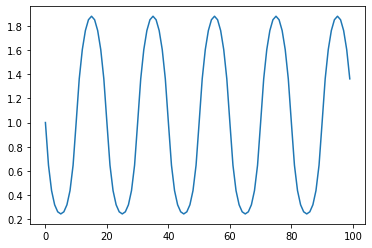

In [22]:
print("with neg relative")
plt.plot(torch.arange(len(neg_rel_cyclic)), neg_rel_cyclic)
plt.show()

In [23]:
x * rel_cyclic

tensor([0.1816, 0.2558, 0.3117, 0.3544, 0.3854, 0.4052, 0.4129, 0.4067, 0.3834,
        0.3370, 0.2563, 0.1717, 0.1201, 0.0910, 0.0772, 0.0745, 0.0827, 0.1045,
        0.1477, 0.2262, 0.3617, 0.5096, 0.6211, 0.7060, 0.7679, 0.8073, 0.8227,
        0.8104, 0.7639, 0.6714, 0.5106, 0.3422, 0.2392, 0.1814, 0.1537, 0.1485,
        0.1647, 0.2082, 0.2942, 0.4508, 0.7208, 1.0154, 1.2376, 1.4068, 1.5300,
        1.6085, 1.6392, 1.6147, 1.5220, 1.3378, 1.0171, 0.6800, 0.4735, 0.3568,
        0.3001, 0.2874, 0.3153, 0.3940, 0.5497, 0.8308, 1.3089, 1.8155, 2.1769,
        2.4325, 2.5990, 2.6825, 2.6821, 2.5908, 2.3933, 2.0608, 1.5345, 1.0064,
        0.6884, 0.5104, 0.4229, 0.3993, 0.4325, 0.5339, 0.7366, 1.1015, 1.7185,
        2.3616, 2.8072, 3.1112, 3.2985, 3.3796, 3.3558, 3.2203, 2.9564, 2.5306,
        1.8738, 1.2223, 0.8319, 0.6138, 0.5062, 0.4758, 0.5132, 0.6310, 0.8671,
        1.2919], dtype=torch.float64)

linear * rel cyclic


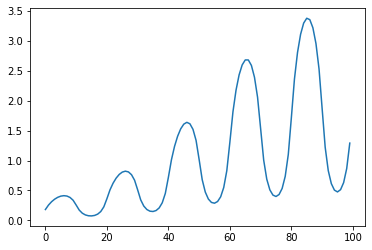

In [24]:
print("linear * rel cyclic")
plt.plot(torch.arange(len(neg_rel_cyclic)), x * rel_cyclic)
plt.show()

In [27]:
soft_lin_cyclic = torch.softmax(x * rel_cyclic, dim=0)
soft_lin_cyclic

tensor([0.0026, 0.0028, 0.0029, 0.0030, 0.0031, 0.0032, 0.0032, 0.0032, 0.0031,
        0.0030, 0.0028, 0.0025, 0.0024, 0.0023, 0.0023, 0.0023, 0.0023, 0.0024,
        0.0025, 0.0027, 0.0031, 0.0036, 0.0040, 0.0043, 0.0046, 0.0048, 0.0049,
        0.0048, 0.0046, 0.0042, 0.0036, 0.0030, 0.0027, 0.0026, 0.0025, 0.0025,
        0.0025, 0.0026, 0.0029, 0.0034, 0.0044, 0.0059, 0.0074, 0.0087, 0.0099,
        0.0107, 0.0110, 0.0107, 0.0098, 0.0081, 0.0059, 0.0042, 0.0034, 0.0031,
        0.0029, 0.0028, 0.0029, 0.0032, 0.0037, 0.0049, 0.0079, 0.0131, 0.0188,
        0.0243, 0.0287, 0.0312, 0.0312, 0.0285, 0.0234, 0.0168, 0.0099, 0.0058,
        0.0043, 0.0036, 0.0033, 0.0032, 0.0033, 0.0036, 0.0045, 0.0064, 0.0119,
        0.0227, 0.0354, 0.0480, 0.0578, 0.0627, 0.0613, 0.0535, 0.0411, 0.0268,
        0.0139, 0.0073, 0.0049, 0.0039, 0.0035, 0.0034, 0.0036, 0.0040, 0.0051,
        0.0078], dtype=torch.float64)

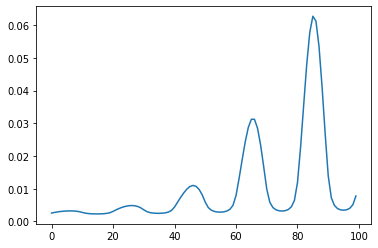

In [28]:
plt.plot(torch.arange(len(soft_lin_cyclic)), soft_lin_cyclic)

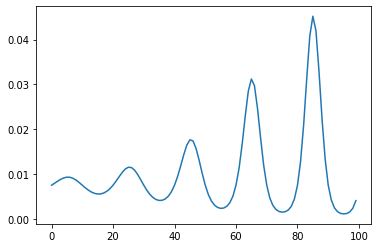

In [31]:
plt.plot(torch.arange(len(cyclic)), torch.softmax(x * cyclic, dim=0))

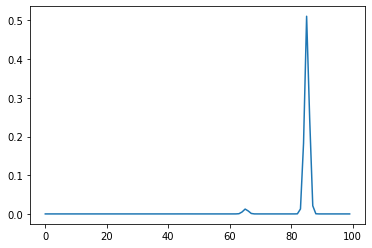

In [36]:
plt.plot(torch.arange(len(cyclic)), torch.softmax(x * cyclic * 10, dim=0))

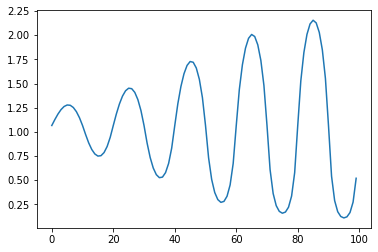

In [37]:
plt.plot(torch.arange(len(cyclic)), relativize_vector(x * cyclic * 10))

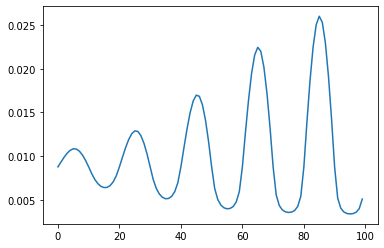

In [43]:
plt.plot(torch.arange(len(cyclic)), torch.softmax(relativize_vector(x * cyclic * 10), dim=0))

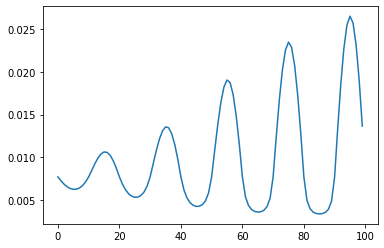

In [42]:
plt.plot(torch.arange(len(cyclic)), torch.softmax(relativize_vector(-x * cyclic * 10), dim=0))